       0         1         2
0  201.0  3.084577  0.022586
1  202.0  3.128713  0.046526
2  203.0  3.192118  0.067701
3  204.0  3.098039  0.004338
4  205.0  3.160976  0.039154
[[ 1.         -0.35697595]
 [-0.35697595  1.        ]]


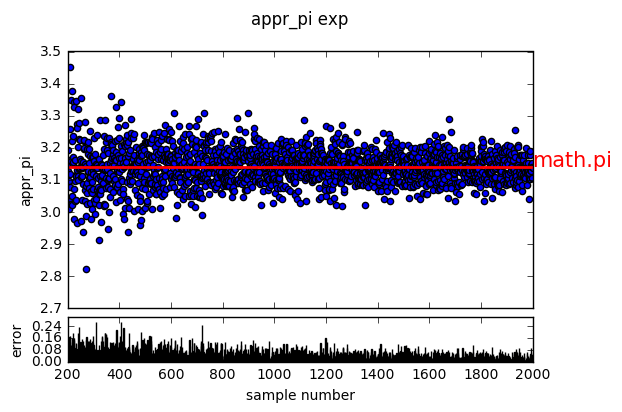

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

#樣本個數
sample = 2000

def dist2_00(x, y):
    dist = math.sqrt(x**2+y**2)
    return dist

def appr_pi(sample):

    count=0

    X = np.random.random_sample(sample)
    Y = np.random.random_sample(sample)

    for i in range(sample):
        if dist2_00(X[i], Y[i])<1:
            count+=1

    approximate_pi = 4*(count/sample)

    return approximate_pi

def xyz_list(sample):
    x_sample = []
    y_pi = []
    z_error = []
    
    for i in range(200,sample):
        x_sample.append(i+1)

        tmpi = appr_pi(i+1)
        y_pi.append(tmpi)

        err = abs(appr_pi(i+1)-math.pi)
        z_error.append(err)

    all_list = []
    all_list.append(x_sample)
    all_list.append(y_pi)
    all_list.append(z_error)
    
    return all_list

#用list讀取sample數量、近似pi、誤差值三組數據
data = xyz_list(sample)

df = np.array(data)
df_data = pd.DataFrame(np.array(data))
df = df_data.T

print(df.head())

fig = plt.figure()

#ax1是主圖
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
plt.title('appr_pi exp\n')
plt.ylabel('appr_pi')
plt.setp(ax1.get_xticklabels(), visible=False)

#ax2是誤差圖 
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
plt.xlabel('sample number')
plt.ylabel('error')


ax1.scatter(data[0], data[1])
ax1.set_xlim(200, sample) #設x軸的範圍200到sample數目
ax1.axhline(y=math.pi, linewidth=2, color='r') #以標準答案當基準線
ax1.text(data[0][-1], math.pi, 'math.pi', color='r', fontsize=15)

ax2.bar(data[0], data[2])
ax2.yaxis.set_major_locator(mticker.MaxNLocator(4)) #把y軸變好看

#計算誤差值與樣本數的相關係數(理論上是負相關)
corr = np.corrcoef(data[0], data[2])
print(corr)

plt.show()